C:\Users\Rene\Anaconda\lib\site-packages\matplotlib\animation.py:1218: UserWarning: MovieWriter ffmpeg unavailable
  warnings.warn("MovieWriter %s unavailable" % writer)


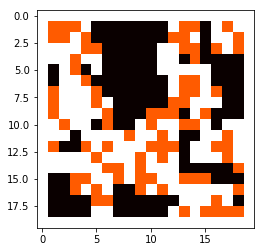

In [28]:
import matplotlib.animation as anim
import matplotlib.pyplot as plt
import numpy as np


def Lattice(N):
    lattice = np.zeros((N,N))
    'occupy the center'
    lattice[N//2,N//2]=1
    lattice[:,0] = lattice[0,:] = lattice[:,-1] = lattice[-1,:] = 2
    return lattice
    
def nextstep(x,y):
    adjacents = np.array([np.array([ 0,  1]), np.array([ 1,  0]), np.array([-1,  0]), np.array([ 0, -1])])
    choice = np.random.randint(0,4)
    x += adjacents[choice][0]
    y += adjacents[choice][1]
    return x,y

fig = plt.figure()
im = []
count = 1
lattice = Lattice(20)
x = y = 0
p = 0.4

N = 20
np.random.seed()
for i in range(1000):
    r = np.random.random()
    x,y = nextstep(x,y)
    if np.abs(N//2+x) < N and np.abs(N//2+y) < N:
        if lattice[N//2 + x][N//2 + y] == 0:
            if r < p: 
                lattice[N//2 + x][N//2 + y] = 1
                count +=1
            else: lattice[N//2 + x][N//2 + y] = 2
        else: 
            continue
    im.append([plt.imshow(lattice, animated=True, cmap = 'hot')])
    
percolation = anim.ArtistAnimation(fig, im, interval = 50, blit = True)
percolation.save("percolation04.html")
    